In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import os
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

In [3]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(500, 500, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),               
    Dense(4, activation='softmax')  
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy','AUC'])

In [3]:
model.load_weights("ham_multi_bestWeights_v1.h5")

In [6]:
X_test_v1 = pd.read_csv("X_test_v1.csv")
y_test_v1 = pd.read_csv("y_test_v1.csv")

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,                  
    rotation_range=40,               
    width_shift_range=0.2,           
    height_shift_range=0.2,          
    shear_range=0.2,                 
    zoom_range=0.2,                  
    horizontal_flip=True,            
    fill_mode='nearest',             
)

In [6]:
val_generator = train_datagen.flow_from_directory(
    os.path.join("datasets","HAM10000_ESTRUTURADO","validacao"),                        
    target_size=(500, 500),          
    batch_size=32,          
    class_mode='categorical'     
)

Found 814 images belonging to 4 classes.


# Versão 1

In [45]:
PREDS_V1 = model.predict(val_generator)

In [21]:
val_generator.class_indices

{'benigna': 0, 'bkl': 1, 'mel': 2, 'mopm': 3}

In [46]:
preds_v1 = [probs.argmax() for probs in PREDS_V1]

In [47]:
y_test_v1 = pd.read_csv("y_test_v1.csv")
y_test_v1.replace(val_generator.class_indices,inplace=True)

In [48]:
cm_v1 = confusion_matrix(y_test_v1,preds_v1)

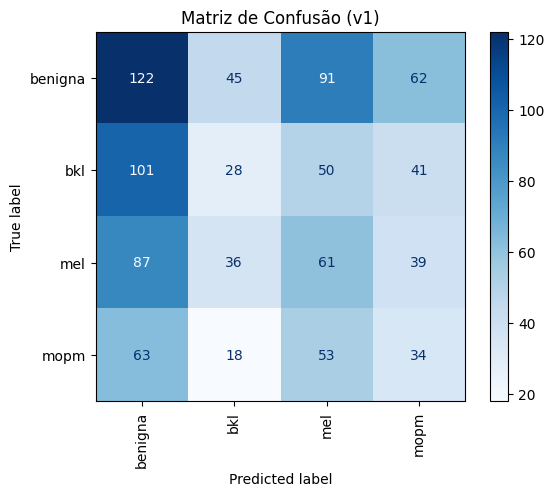

In [50]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_v1, display_labels=['benigna','bkl','mel','mopm'])
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title("Matriz de Confusão (v1)")
plt.show()

In [71]:
print(f"Acurácia: {(y_test_v1['dx'] == preds_v1).sum()/y_test_v1.shape[0]}")

Acurácia: 0.2631578947368421


# Versão 2

In [7]:
PREDS_V2 = model.predict(val_generator)
model.load_weights("ham_multi_bestWeights_v2.h5")
y_test_v2 = pd.read_csv("y_test_v2.csv")
y_test_v2.replace(val_generator.class_indices,inplace=True)

In [8]:
val_generator.class_indices

{'bcc': 0, 'bkl': 1, 'mel': 2, 'nv': 3}

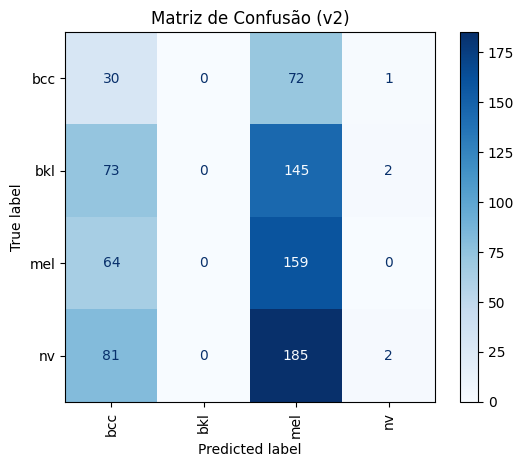

In [10]:
preds_v2 = [probs.argmax() for probs in PREDS_V2]
cm_v2 = confusion_matrix(y_test_v2,preds_v2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_v2, display_labels=['bcc','bkl','mel','nv'])
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title("Matriz de Confusão (v2)")
plt.show()

In [11]:
print(f"Acurácia: {(y_test_v2['dx'] == preds_v2).sum()/y_test_v2.shape[0]}")

Acurácia: 0.23464373464373464
